# Decay Time
## Computational Nuclear Physics
### Project 3

### Papadopoulou Martha

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

### Define Lambda Constant

In [2]:
def cal_lambda(T):
    l = np.log(2) / T
    return l

### Define General Decay Model

In [3]:
def decay(lambdas):
    lambdas = np.array(lambdas) 
    ks = len(lambdas)
    a11 = 100 # define initial number N_1(t=0)

    # Compute all N_k functions
    def Nks(k):
        
        # Calculate the a_ki coefficients
        def ak(i):
            
            # Calculate numerator (for N_1 numerator is 1)
            num = np.prod(lambdas[:k-1]) if k > 1 else 1
            
            # Calculate denominator (initialize as 1)
            den = 1
            for j in range(k):
                if j != i:
                    den *= (lambdas[j] - lambdas[i])

            # Calculate and return a_ki value
            a_ki = num * a11 / den
            return a_ki

        # Collect all a_ki coefficients
        aki = [ak(i) for i in range(k)]

        # Compute each N_k function
        def Nk(t):
            N = sum(aki[i] * np.exp(-lambdas[i] * t) for i in range(k))
            return np.maximum(N, 0) # avoid negative values

        return Nk

    # Collect all N_k(t) functions
    functions = []
    for k in range(1, ks+1):
        functions.append(Nks(k))

    return functions

# Decay Chain for Three Elements
### Fr-216, At-212, Bi-208

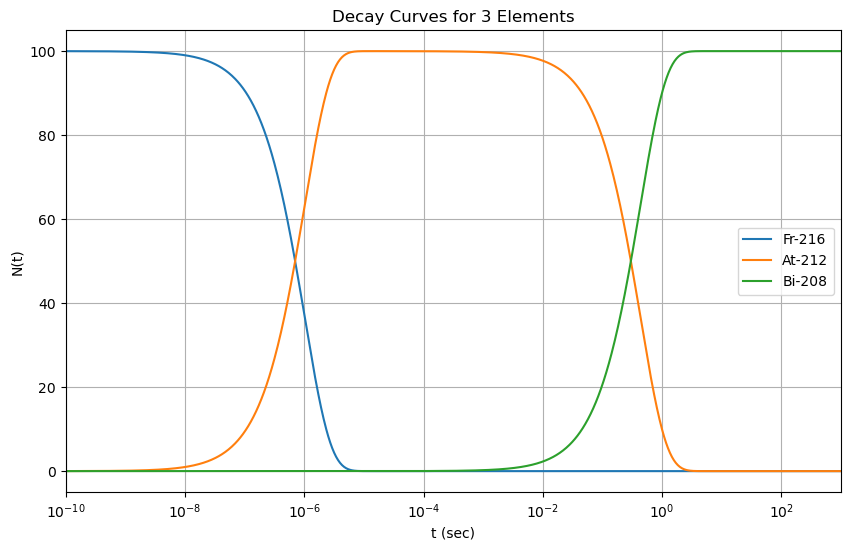

In [4]:
# Define half life time in seconds
T_3 = {
    "Fr-216": 0.7 * 10**(-6),
    "At-212": 0.3,
    "Bi-208": 0.37 * 10**6 * 365 * 24 * 3600
}

# Calculate lambda constants
lambdas_3 = [cal_lambda(T) for T in T_3.values()]

# Compute N_k(t) functions
N_3 = decay(lambdas_3)

# Define time range
time_3 = np.logspace(-10, 100, 10000)

# Plot the curves of each element
plt.figure(figsize=(10, 6))

for i, func in enumerate(N_3):
    label_3 = list(T_3.keys())[i]  
    decay_curve_3 = N_3[i](time_3)
    plt.plot(time_3, decay_curve_3, label=f"{label_3}")

plt.title("Decay Curves for 3 Elements")
plt.xlabel("t (sec)")
plt.ylabel("N(t)")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.xlim([1e-10, 1e3])
plt.show()

# Decay Chain for Twelve Elements
### Cf-244, Cm-240, Pu-236, U-232, Th-228, Ra-224, Rn-220, Po-216, Pb-212, Bi-212, Tl-208, Pb-208

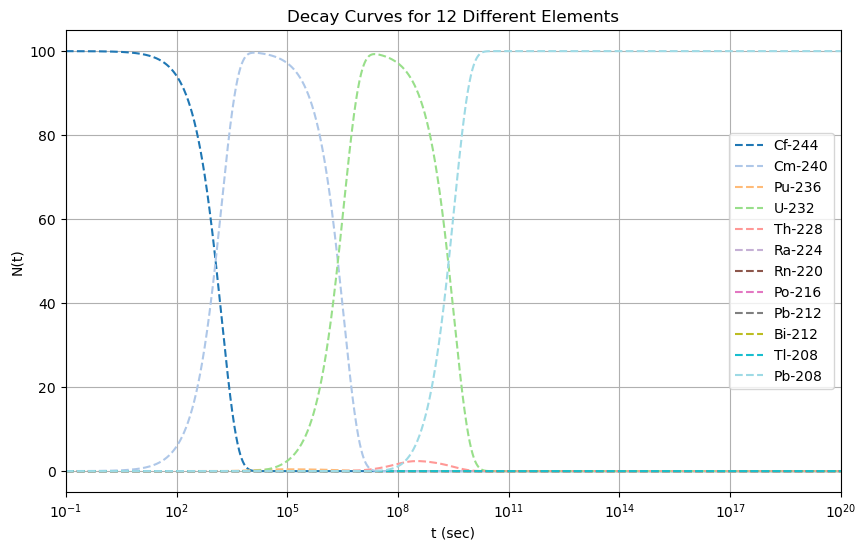

In [5]:
# Define half life time in seconds
T_12 = {
    "Cf-244": 19 * 60,
    "Cm-240": 27 * 24 * 3600,
    "Pu-236": 2.9 * 3600,
    "U-232": 72 * 365 * 24 * 3600,
    "Th-228": 1.9 * 365 * 24 * 3600,
    "Ra-224": 3.7 * 24 * 3600,
    "Rn-220": 56,
    "Po-216": 0.15,
    "Pb-212": 11 * 3600,
    "Bi-212": 61 * 60,
    "Tl-208": 3.1 * 60,
    "Pb-208": 1e1000  # stable
}

# Calculate lambda constants
lambdas_12 = [cal_lambda(T) for T in T_12.values()]

# Compute N_k(t) functions
N_12 = decay(lambdas_12)

# Define time range
time_12 = np.logspace(-10, 100, 10000)

# Plot the curves of each element
plt.figure(figsize=(10, 6))

# Use a colormap to avoid color repeat
colors = colormaps['tab20'].resampled(len(N_12))

for i, func in enumerate(N_12):
    label_12 = list(T_12.keys())[i]
    decay_curve_12 = N_12[i](time_12)
    plt.plot(time_12, decay_curve_12, label=f"{label_12}", linestyle='--', color=colors(i))

plt.title("Decay Curves for 12 Different Elements")
plt.xlabel("t (sec)")
plt.ylabel("N(t)")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.xlim([1e-1, 1e20])
plt.show()

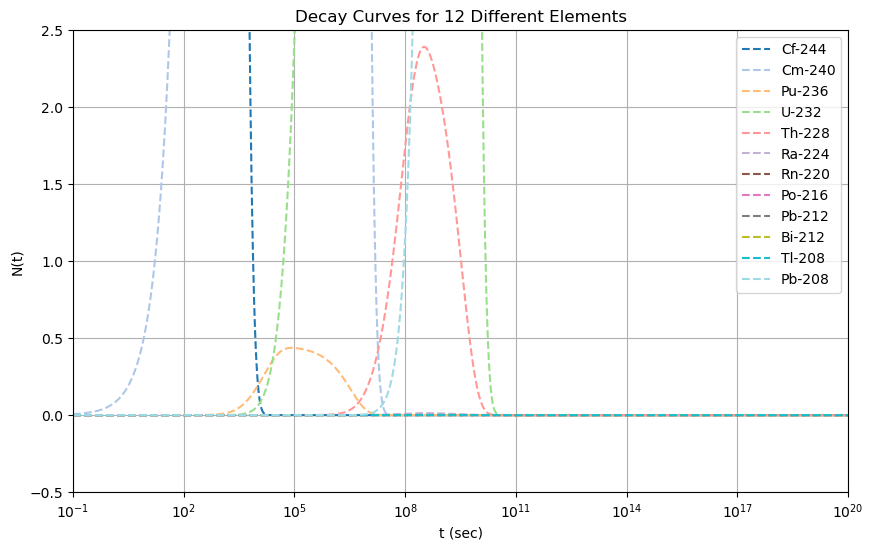

In [6]:
# Plot the curves zoomed in 
plt.figure(figsize=(10, 6))

for i, func in enumerate(N_12):
    label_12 = list(T_12.keys())[i] 
    decay_curve_12 = N_12[i](time_12)
    plt.plot(time_12, decay_curve_12, label=f"{label_12}", linestyle='--', color=colors(i))

plt.title("Decay Curves for 12 Different Elements")
plt.xlabel("t (sec)")
plt.ylabel("N(t)")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.ylim([-0.5, 2.5])
plt.xlim([1e-1, 1e20])
plt.show()

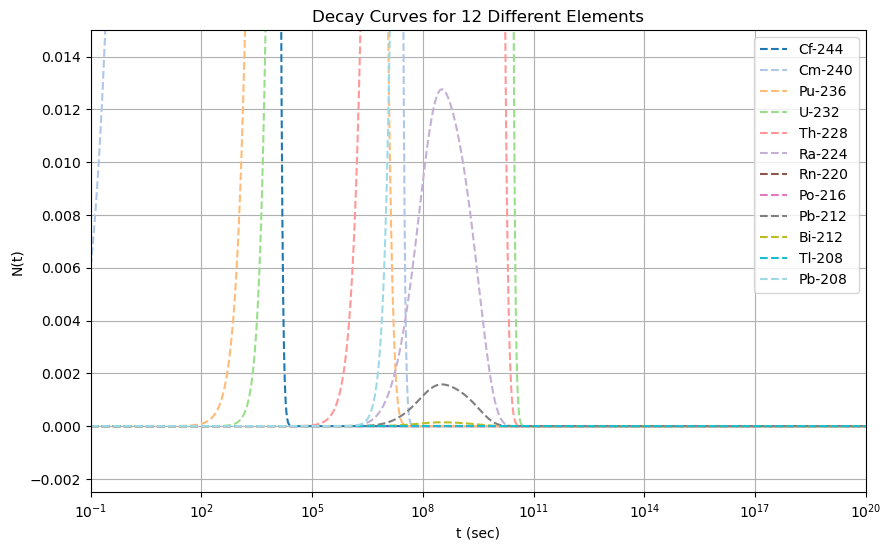

In [7]:
# Plot the curves even more zoomed in 
plt.figure(figsize=(10, 6))

for i, func in enumerate(N_12):
    label_12 = list(T_12.keys())[i]
    decay_curve_12 = N_12[i](time_12)
    plt.plot(time_12, decay_curve_12, label=f"{label_12}", linestyle='--', color=colors(i))

plt.title("Decay Curves for 12 Different Elements")
plt.xlabel("t (sec)")
plt.ylabel("N(t)")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.ylim([-0.0025, 0.015])
plt.xlim([1e-1, 1e20])
plt.show()

# Approximations for Decay of Two Elements

### Define N_2(t) for lambda_1 > lambda_2

In [8]:
def l1_greater_l2(lambdas):
    a11 = 100 # define initial number N_1(t=0)

    # Compute N_2
    def N2(t):
        
        # Transition point t >> 1/lambda_1 
        t_transition = 6 * 1 / lambdas[0] 
        
        # Use exact formula before transition point and approximation after
        N_2 = np.where(t < t_transition,
                       (lambdas[0] * a11 * (np.exp(-lambdas[0] * t) - np.exp(-lambdas[1] * t))) / (lambdas[1] - lambdas[0]),
                       (lambdas[0] * a11 * np.exp(-lambdas[1] * t)) / (lambdas[0] - lambdas[1]))
        
        return np.maximum(N_2, 0), t_transition

    return N2  

### Compute Decay Curves for Cf-244 and Cm-240

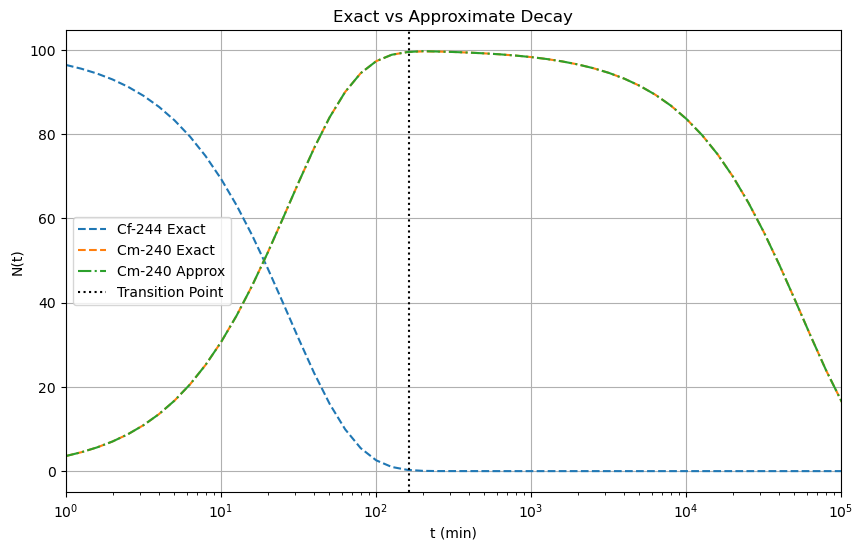

In [9]:
# Define half life time in minutes
T_approx_1 = {
    "Cf-244": 19,
    "Cm-240": 27 * 24 * 60
}

# Calculate lambda constants 
lambdas_approx_1 = [cal_lambda(T) for T in T_approx_1.values()]

# Compute N_k(t) functions
N_exact_1 = decay(lambdas_approx_1) 
N_approx_1 = l1_greater_l2(lambdas_approx_1)

# Define time range
time_approx_1 = np.logspace(0, 100, 1000)

# Plot the two models
plt.figure(figsize=(10, 6))

# Exact model
plt.plot(time_approx_1, N_exact_1[0](time_approx_1), label=f"{list(T_approx_1.keys())[0]} Exact", linestyle='--')
plt.plot(time_approx_1, N_exact_1[1](time_approx_1), label=f"{list(T_approx_1.keys())[1]} Exact", linestyle='--')

# Approximate model
N2_values_1, transition_time_1 = N_approx_1(time_approx_1)
plt.plot(time_approx_1, N2_values_1, label=f"{list(T_approx_1.keys())[1]} Approx", linestyle='-.')

# Plot vertical line at transition time
plt.axvline(x=transition_time_1, color='black', linestyle=':', label="Transition Point")

plt.xlabel("t (min)")
plt.ylabel("N(t)")
plt.title("Exact vs Approximate Decay")
plt.xscale('log')
plt.xlim([1, 100000])
plt.legend()
plt.grid(True)
plt.show()

### Define N_2(t) for lambda_1 < lambda_2¶

In [10]:
def l1_lesser_l2(lambdas):
    a11 = 100 # define initial number N_1(t=0)

    # Compute N_2
    def N2(t):
        
        # Transition point t >> 1/lambda_2
        t_transition = 5 * 1 / lambdas[1]
        
        # Use exact formula before transition point and approximation after
        N_2 = np.where(t < t_transition,
                       (lambdas[0] * a11 * (np.exp(-lambdas[0] * t) - np.exp(-lambdas[1] * t))) / (lambdas[1] - lambdas[0]),
                       (lambdas[0] * a11 * np.exp(-lambdas[0] * t)) / (lambdas[1] - lambdas[0]))
        
        return np.maximum(N_2, 0), t_transition

    return N2  

### Compute Decay Curves for Pu-232 and U-229

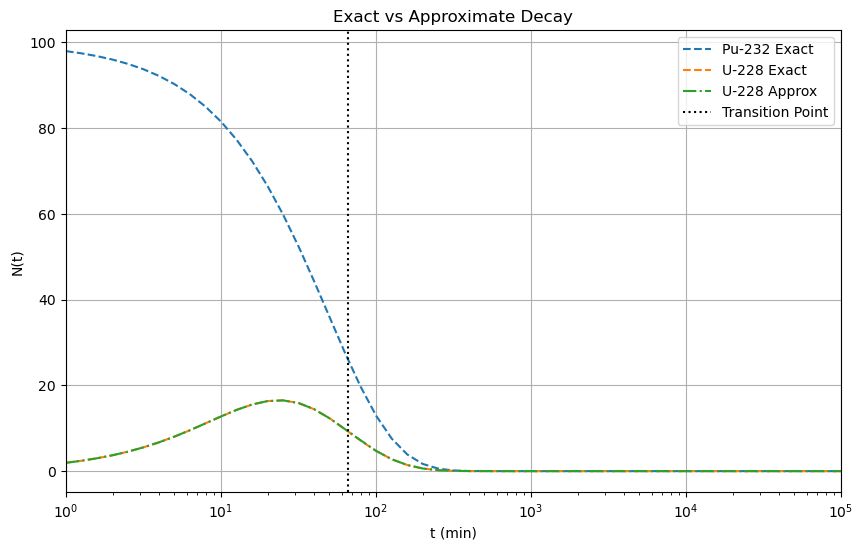

In [11]:
# Define half life time in minutes
T_approx_2 = {
    "Pu-232": 34,
    "U-228": 9.1
}

# Calculate lambda constants 
lambdas_approx_2 = [cal_lambda(T) for T in T_approx_2.values()]

# Compute N_k(t) functions
N_exact_2 = decay(lambdas_approx_2) 
N_approx_2 = l1_lesser_l2(lambdas_approx_2)

# Define time range
time_approx_2 = np.logspace(0, 100, 1000)

# Plot the two models
plt.figure(figsize=(10, 6))

# Exact model
plt.plot(time_approx_2, N_exact_2[0](time_approx_2), label=f"{list(T_approx_2.keys())[0]} Exact", linestyle='--')
plt.plot(time_approx_2, N_exact_2[1](time_approx_2), label=f"{list(T_approx_2.keys())[1]} Exact", linestyle='--')

# Approximate model
N2_values_2, transition_time_2 = N_approx_2(time_approx_2)
plt.plot(time_approx_2, N2_values_2, label=f"{list(T_approx_2.keys())[1]} Approx", linestyle='-.')

# PLot vertical line at transition time
plt.axvline(x=transition_time_2, color='black', linestyle=':', label="Transition Point")

plt.xlabel("t (min)")
plt.ylabel("N(t)")
plt.title("Exact vs Approximate Decay")
plt.xscale('log')
plt.xlim([1, 100000])
plt.legend()
plt.grid(True)
plt.show()